# Fall Problem Session 3
## More Regression

The problems in this notebook will cover the content covered in our `Regression` lectures including:
- `Simple Linear Regression`,
- `A First Predictive Modeling Project`,
- `Multiple Linear Regression` and
- `Categorical Variables and Interactions`.

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Preparing the data

In this notebook you will continue to model the selling price of various vechicles. First we have to load the data and repeat some of the cleaning we did in `Fall Problem Session 2`.

##### a.

- Load the `car_sales.csv` data set again
- Remove the missing values
- Create the `log_sell` and `log_km` columns
- Clean the `mileage`, `engine` and `max_power` columns with `clean_column` and
- Create the `age` column.

In [2]:
def clean_column(text):
    return float(text.split()[0])

In [3]:
cars = pd.read_csv("../Data/car_sales.csv")
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars.dropna(inplace=True)

In [5]:
cars['mileage'] = cars['mileage'].apply(clean_column)
cars['engine'] = cars['engine'].apply(clean_column)
cars['max_power'] = cars['max_power'].apply(clean_column)

In [6]:
cars['log_sell'] = np.log10(cars['selling_price'])
cars['log_km'] = np.log10(cars['km_driven'])

In [7]:
cars['age'] = 2020 - cars['year']

In [8]:
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_sell,log_km,age
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,5.653213,5.162863,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,5.568202,5.079181,6
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,5.198657,5.146128,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,5.352183,5.103804,10
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,5.113943,5.079181,13


##### b.

Make the train test split using `sklearn`'s `train_test_split`.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
cars_train, cars_test = train_test_split(cars.copy(),
                                        random_state = 100,
                                        test_size = 0.2,
                                        shuffle = True)

##### c.

Look at the first five rows of the training set to refresh yourself on the columns in the data set.

In [11]:
cars_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_sell,log_km,age
458,Nissan Terrano XL Plus 85 PS,2015,580000,90000.0,Diesel,Individual,Manual,First Owner,20.45,1461.0,83.80,200Nm@ 1900rpm,5.0,5.763428,4.954243,5
2270,Hyundai Grand i10 Sportz Celebration Edition,2016,480000,70000.0,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0,5.681241,4.845098,4
3817,Honda Brio Exclusive Edition,2013,355000,80000.0,Petrol,Individual,Manual,First Owner,19.40,1198.0,86.80,109Nm@ 4500rpm,5.0,5.550228,4.903090,7
3533,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000.0,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0,5.809560,4.041393,4
1766,Hyundai Xcent 1.2 VTVT S,2019,590000,90000.0,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,5.770852,4.954243,1


##### d.

Here is a variable summary for your convenience.

<u>Outcome Variable</u>
- `selling_price` or `log_sell` (you will use `log_sell` in your models)

<u>Continuous Features</u>
- `km_driven` and thus `log_km`
- `mileage`
- `engine`
- `max_power`
- `seats`
- `age`

<u>Categorical Features</u>
- `fuel`
- `seller_type`
- `transmission`
- `owner`

You will ignore `torque` because it would require more cleaning than we will spend time on in these problem sessions.

#### 2. More EDA

In `Fall Problem Session 2` you examined potential linear relationships with `log_sell` and:
- `log_km`,
- `mileage` and
- `age`.

In this notebook you will examine potential effects of the various categorical variables listed above.

##### a. 

One way to examine if a cateorical variable has an impact on an outcome variable of interest is to compare the mean or median of the outcome variable among the different categories.

Use `pandas` `groupby`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html</a>, to examine the mean or median of `log_sell` by the four categorical features listed above.

In [12]:
## For 'fuel' here
cars.groupby('fuel').log_sell.mean()



fuel
CNG       5.479848
Diesel    5.750880
LPG       5.288477
Petrol    5.522787
Name: log_sell, dtype: float64

In [13]:
## For 'seller_type' here
cars.groupby('seller_type').log_sell.mean()


seller_type
Dealer              5.958298
Individual          5.586067
Trustmark Dealer    5.831381
Name: log_sell, dtype: float64

In [14]:
## For 'transmission' here
cars.groupby('transmission').log_sell.mean()



transmission
Automatic    6.109846
Manual       5.575097
Name: log_sell, dtype: float64

In [15]:
## For 'owner' here
cars.groupby('owner').log_sell.mean()



owner
First Owner             5.744548
Fourth & Above Owner    5.261161
Second Owner            5.491583
Third Owner             5.360232
Name: log_sell, dtype: float64

##### b.

Another way to investigate the potential impact of categorical variables is to make plots examining the distribution of the outcome variable for each different category. Two common plots that are considered are box and whisker plots and violin plots. These can be made quickly using `seaborn`'s `boxplot`, <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">https://seaborn.pydata.org/generated/seaborn.boxplot.html/</a>, and `violinplot`, <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html">https://seaborn.pydata.org/generated/seaborn.violinplot.html</a> functions.

Below you will see an example of both plotting the training distribution of `log_sell` against `fuel`. After that make either a box plot or a violin plot for the remaining three categorical variables.

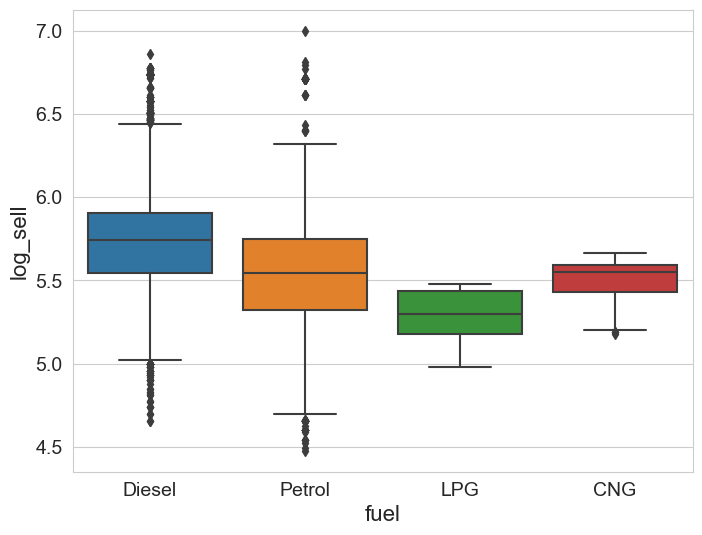

In [16]:
## Boxplot for fuel
plt.figure(figsize=(8,6))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("fuel", fontsize=16)

plt.show()

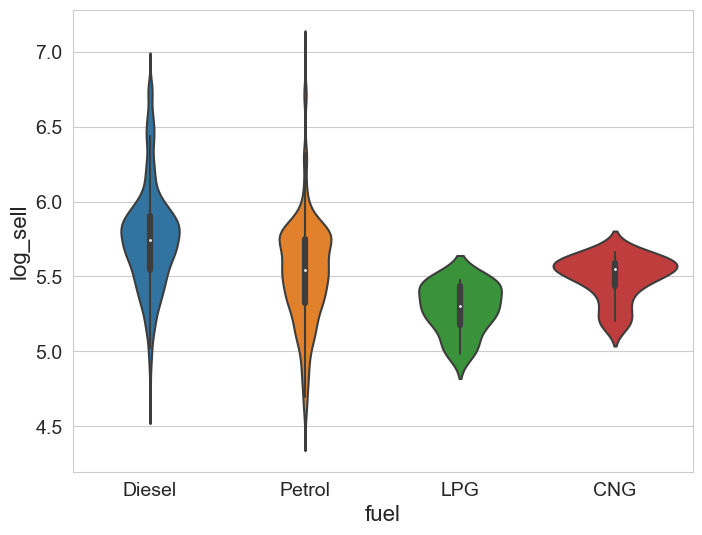

In [17]:
## violinplot for fuel
plt.figure(figsize=(8,6))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("fuel", fontsize=16)

plt.show()

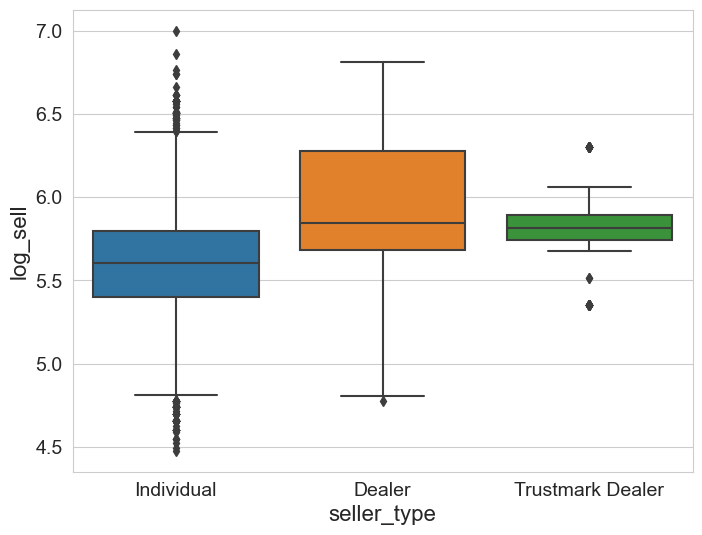

In [18]:
## For 'seller_type'
## Boxplot for fuel
plt.figure(figsize=(8,6))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'seller_type')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("seller_type", fontsize=16)

plt.show()




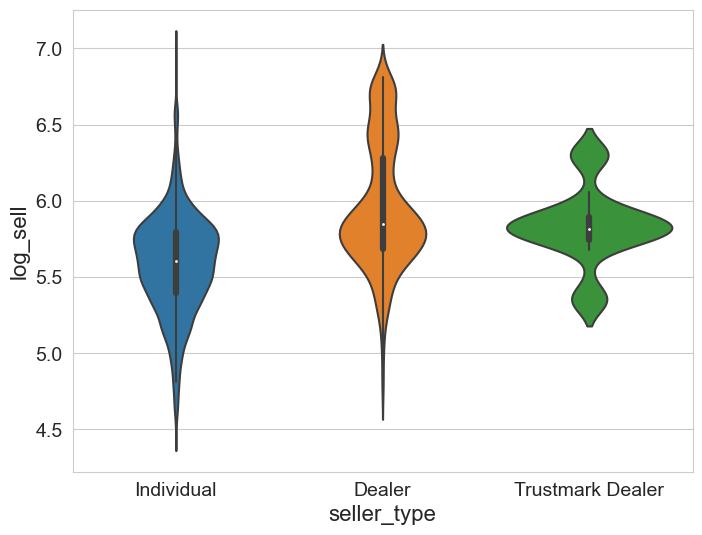

In [19]:
plt.figure(figsize=(8,6))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'seller_type')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("seller_type", fontsize=16)

plt.show()

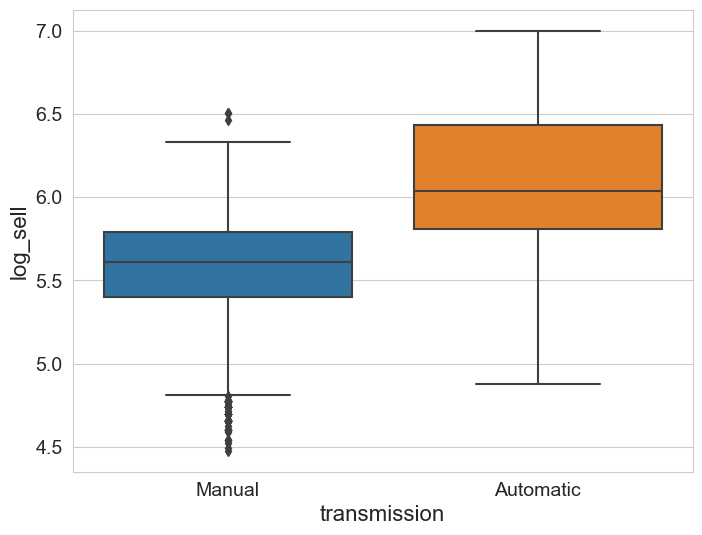

In [20]:
## For 'transmission'
## Boxplot for fuel
plt.figure(figsize=(8,6))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'transmission')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("transmission", fontsize=16)

plt.show()




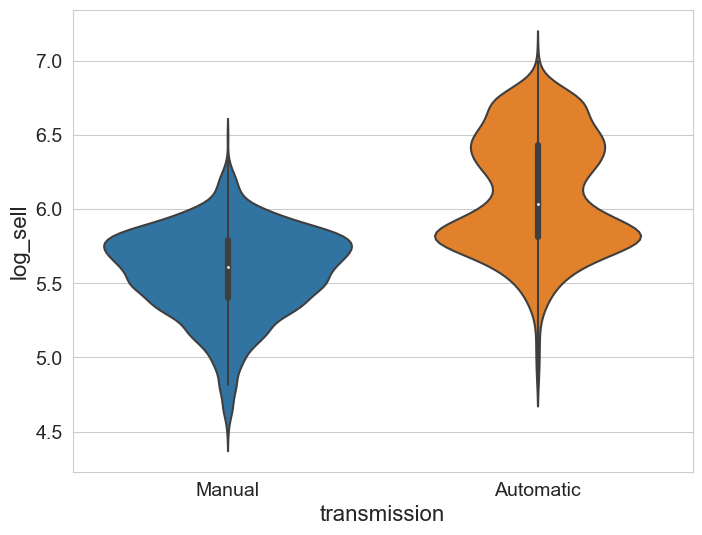

In [21]:
plt.figure(figsize=(8,6))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'transmission')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("transmission", fontsize=16)

plt.show()

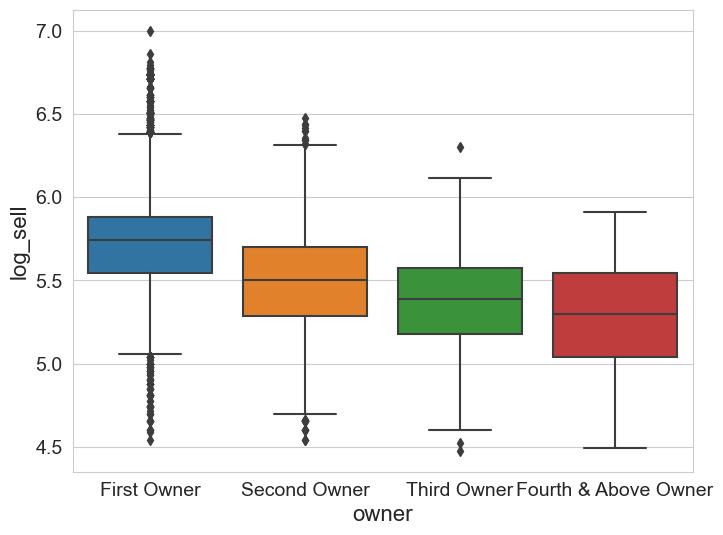

In [22]:
## For 'owner'
## Boxplot for fuel
plt.figure(figsize=(8,6))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'owner')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("owner", fontsize=16)

plt.show()




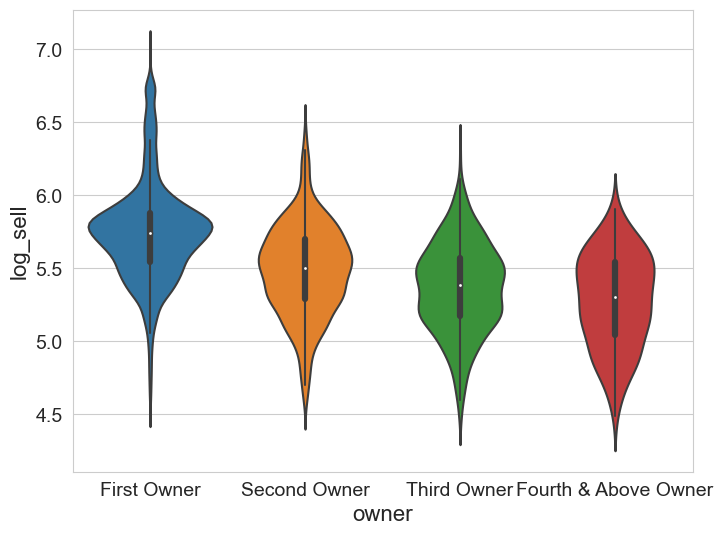

In [23]:
plt.figure(figsize=(8,6))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'owner')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("log_sell", fontsize=16)
plt.xlabel("owner", fontsize=16)

plt.show()

##### c.

Write down any thoughts you have about potentially important categorical variables from your investigations in <i>a.</i> and <i>b.</i> here.

##### Write here





##### d.

From your investigations above you likely noticed that there does seem to be a difference in selling price between vehicles sold by an individual and those sold by some kind of dealer, but the kind of dealer does not seem to matter.

Create a new column in the data set called `dealer` that is `1` if the `seller_type` is a kind of dealership and `0` otherwise.

In [24]:
dummies = pd.get_dummies(cars_train['seller_type'])
cars_train['dealer'] = dummies['Dealer']

In [25]:
cars_train.dealer.value_counts()

0    5456
1     868
Name: dealer, dtype: int64

In [26]:
cars_train.seller_type.value_counts()

Individual          5265
Dealer               868
Trustmark Dealer     191
Name: seller_type, dtype: int64

##### e.

It appears that different `owner` categories lead to different selling prices. However, it is difficult to tell if this variable is capturing a new signal, or is just reflecting a possible relationship between selling price and the age of the vehicle.

To see what is meant by this statement make a box and whisker plot with `age` on the vertical axis and `owner` on the horizontal. Then make a column called `owner_number` that is `1` when `owner` is `"First Owner"`, is `2` when `owner` is `"Second Owner"` and so on. Calculate the Pearson correlation between `age` and `owner_number`.

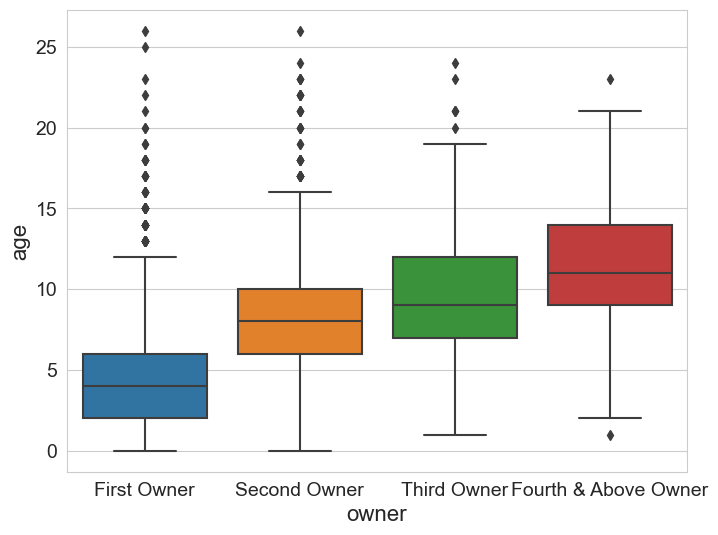

In [27]:
## Make the boxplot here
## For 'owner'
## Boxplot for fuel
plt.figure(figsize=(8,6))

sns.boxplot(data = cars_train,
               y = 'age',
               x = 'owner')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("age", fontsize=16)
plt.xlabel("owner", fontsize=16)

plt.show()

In [28]:
## make the owner_number column here
dummies_owner = pd.get_dummies(cars_train['owner'])
cars_train['owner_number'] = dummies_owner['First Owner']+2*dummies_owner['Second Owner']+3*dummies_owner['Third Owner']+4*dummies_owner['Fourth & Above Owner']

In [29]:
cars_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_sell,log_km,age,dealer,owner_number
458,Nissan Terrano XL Plus 85 PS,2015,580000,90000.0,Diesel,Individual,Manual,First Owner,20.45,1461.0,83.80,200Nm@ 1900rpm,5.0,5.763428,4.954243,5,0,1
2270,Hyundai Grand i10 Sportz Celebration Edition,2016,480000,70000.0,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0,5.681241,4.845098,4,0,1
3817,Honda Brio Exclusive Edition,2013,355000,80000.0,Petrol,Individual,Manual,First Owner,19.40,1198.0,86.80,109Nm@ 4500rpm,5.0,5.550228,4.903090,7,0,1
3533,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000.0,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0,5.809560,4.041393,4,1,1
1766,Hyundai Xcent 1.2 VTVT S,2019,590000,90000.0,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,5.770852,4.954243,1,0,1
1869,Maruti Baleno Delta,2017,570000,25272.0,Petrol,Trustmark Dealer,Manual,First Owner,21.01,1197.0,81.80,113Nm@ 4200rpm,5.0,5.755875,4.402640,3,0,1
549,Maruti Vitara Brezza ZDi Plus Dual Tone,2017,775000,32000.0,Diesel,Dealer,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0,5.889302,4.505150,3,1,1
6408,Maruti Swift Dzire ZXi,2012,355000,90000.0,Petrol,Individual,Manual,Second Owner,17.50,1298.0,85.80,114Nm@ 4000rpm,5.0,5.550228,4.954243,8,0,2
2503,Chevrolet Beat Diesel,2012,120000,60000.0,Diesel,Individual,Manual,Second Owner,25.44,936.0,57.60,150Nm@ 1750rpm,5.0,5.079181,4.778151,8,0,2
870,Maruti Wagon R Duo Lxi,2012,231000,70000.0,LPG,Individual,Manual,First Owner,26.20,998.0,58.20,77Nm@ 3500rpm,5.0,5.363612,4.845098,8,0,1


In [30]:
## get the correlation here
cars_train[['age','owner_number']].corr()


,age,owner_number
age,1.000000,0.506575
owner_number,0.506575,1.000000


The takeaway here is that there is a fair amount of correlation between the age of a vehicle and the number of owners the vehicle has had. From the previous notebook we already know that `log_sell` and `age` have a pretty strong correlation, so it makes sense that `owner` and `log_sell` would also be correlated.


From a predictive modeling sense this means that including `owner` as a categorical feature in a model that also includes `age` may not lead to as huge an improvement to the model as we originally thought.

#### 3. Selecting categorical variables to consider

##### a. 

Using your work in 2. choose some combination of the four categorical variables to add to this model:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

transmission, dealer, fuel_type

##### b.

Make any dummy variables you need given the categories you chose in 3 <i>a.</i>

<a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html</a>.

In [31]:
dummies_fuel = pd.get_dummies(cars_train['fuel'])
cars_train['CNG'] = dummies_fuel['CNG']
cars_train['LPG'] = dummies_fuel['LPG']
cars_train['Diesel'] = dummies_fuel['Diesel']
cars_train['Petrol'] = dummies_fuel['Petrol']

In [32]:
dummies_transmission = pd.get_dummies(cars_train['transmission'])
cars_train['Automatic'] = dummies_transmission['Automatic']

In [63]:
cars_train['age_dealer'] = cars_train.dealer * cars_train.age

#### 4. Comparing models

##### a.

Write out the model(s) you will compare to:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

using cross-validation below.

##### Write your response here

##### b.

Fill in the missing code below to perform cross-validation to compare all of the models from 4. <i>a.</i>.

In [33]:
## import KFold
from sklearn.model_selection import KFold

## import LinearRegression
from sklearn.linear_model import LinearRegression

## import mean_squared_error
from sklearn.metrics import mean_squared_error

In [45]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(random_state = 100,
             shuffle = True,
             n_splits = 5)



## This array will hold the mse for each model and split
mses = np.zeros((5,5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ## Make your models and record the mses here
    mses[0,i] = mean_squared_error(cars_ho['log_sell'],np.mean(cars_tt['log_sell'])*np.ones(len(cars_ho['log_sell'])))
    
    model1 = LinearRegression(copy_X=True)
    model1.fit(cars_tt['age'].values.reshape(-1,1),cars_tt['log_sell'])    
    mses[1,i] = mean_squared_error(cars_ho['log_sell'],model1.predict(cars_ho['age'].values.reshape(-1,1)))
    
    model2 = LinearRegression(copy_X=True)
    model2.fit(cars_tt['dealer'].values.reshape(-1,1),cars_tt['log_sell'])    
    mses[2,i] = mean_squared_error(cars_ho['log_sell'],model2.predict(cars_ho['dealer'].values.reshape(-1,1)))
    
    model3 = LinearRegression(copy_X=True)
    model3.fit(cars_tt['Automatic'].values.reshape(-1,1),cars_tt['log_sell'])    
    mses[3,i] = mean_squared_error(cars_ho['log_sell'],model3.predict(cars_ho['Automatic'].values.reshape(-1,1)))
    
    model4 = LinearRegression(copy_X=True)
    model4.fit(cars_tt['Diesel'].values.reshape(-1,1),cars_tt['log_sell'])    
    mses[4,i] = mean_squared_error(cars_ho['log_sell'],model4.predict(cars_ho['Diesel'].values.reshape(-1,1)))
    
    i += 1
    

In [44]:
## find the avg cv mses here
mses.mean(1)

array([6.59315741e+11, 6.54799459e-02, 1.13552326e-01, 9.68551486e-02,
       1.16081174e-01])

##### c. 

Recall that we ultimately care about predicting the final selling price, not the logarithm of the final selling price. Copy and paste your cross-validation code and alter it slightly so that you compare the prediction of:

$$
10^{\log (\text{Selling Price})}
$$

to the actual selling price. Look at the root mean squared error which is in the original units of `selling_price`.

In [69]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(random_state = 100,
             shuffle = True,
             n_splits = 5)

## This array will hold the mse for each model and split
mses = np.zeros((5,5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ## Make your models and record the mses here
    mses[0,i] = mean_squared_error(np.power(10,cars_ho['log_sell']),np.mean(np.power(10,cars_tt['log_sell']))*np.ones(len(cars_ho['log_sell'])))
    
    model1 = LinearRegression(copy_X=True)
    model1.fit(cars_tt['age'].values.reshape(-1,1),np.power(10,cars_tt['log_sell']))    
    mses[1,i] = mean_squared_error(np.power(10,cars_ho['log_sell']),model1.predict(cars_ho['age'].values.reshape(-1,1)))
    
    model2 = LinearRegression(copy_X=True)
    model2.fit(cars_tt[['dealer','age','age_dealer']].values,np.power(10,cars_tt['log_sell']))    
    mses[2,i] = mean_squared_error(np.power(10,cars_ho['log_sell']),model2.predict(cars_ho[['dealer','age','age_dealer']].values))
    
    model3 = LinearRegression(copy_X=True)
    model3.fit(cars_tt['Automatic'].values.reshape(-1,1),np.power(10,cars_tt['log_sell']))    
    mses[3,i] = mean_squared_error(np.power(10,cars_ho['log_sell']),model3.predict(cars_ho['Automatic'].values.reshape(-1,1)))
    
    model4 = LinearRegression(copy_X=True)
    model4.fit(cars_tt[['age','Diesel','Petrol','CNG','LPG']],np.power(10,cars_tt['log_sell']))    
    mses[4,i] = mean_squared_error(np.power(10,cars_ho['log_sell']),model4.predict(cars_ho[['age','Diesel','Petrol','CNG','LPG']]))
    
    i += 1

In [65]:
## Find the avg cv rmses here

np.sqrt(mses.mean(1))

array([811982.59904817, 740428.27733198, 661631.57595963, 657465.70289782,
       723017.96170722])

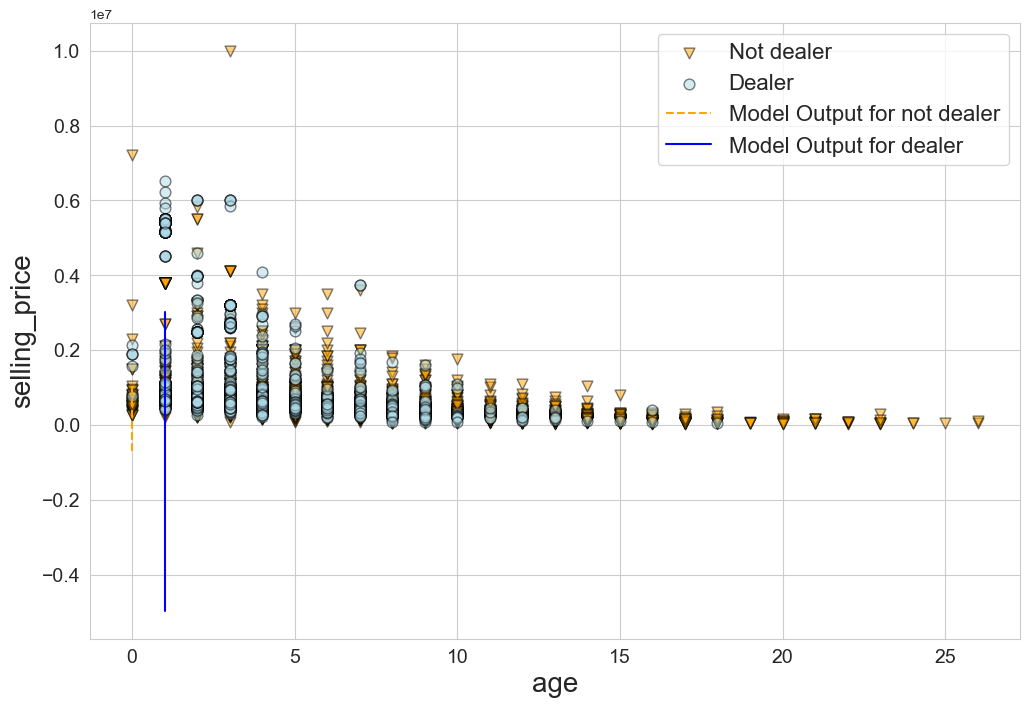

In [71]:
## This code plots that model with the training data ##

plt.figure(figsize=(12,8))

plt.scatter(cars_train.loc[cars_train.dealer==0].age,
               cars_train.loc[cars_train.dealer==0].selling_price,
               label="Not dealer",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
plt.scatter(cars_train.loc[cars_train.dealer==1].age,
               cars_train.loc[cars_train.dealer==1].selling_price,
               label="Dealer",
               s=60,
               alpha=.5,
               edgecolor='black',
               c='lightblue')
xs_not_dealer = np.zeros((1000,3))
xs_not_dealer[:,1] = np.linspace(cars_train.age.min()-2,
                    cars_train.age.max()+2,1000)
xs_not_dealer[:,2] = xs_not_dealer[:,0]*xs_not_dealer[:,1]
not_dealer_line = model2.predict(xs_not_dealer)

xs_dealer = np.ones((1000,3))
xs_dealer[:,1] = np.linspace(cars_train.age.min()-2,
                    cars_train.age.max()+2,1000)
xs_dealer[:,2] = xs_dealer[:,0]*xs_dealer[:,1]
dealer_line = model2.predict(xs_dealer)


plt.plot(xs_not_dealer[:,0],not_dealer_line,
            '--', 
            c='orange',
            linewidth=1.5,
            label="Model Output for not dealer")
plt.plot(xs_dealer[:,0], dealer_line,
            '-', 
            c='blue',
            linewidth=1.5,
            label="Model Output for dealer")


plt.xlabel("age", fontsize=20)
plt.ylabel("selling_price", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

plt.show()

##### d.

If you have time you can use this space to try additional models.

In [57]:
cars_train.age.values

array([ 5,  4,  7, ..., 11, 13,  9])

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)